<a href="https://colab.research.google.com/github/MustafaYassinM/Data_science_projects/blob/main/Naive_Bayes%20(Email%20spam/ham%20classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv ('/content/drive/MyDrive/Spam')

In [5]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
df.drop(['Unnamed: 0'],axis =1, inplace = True )

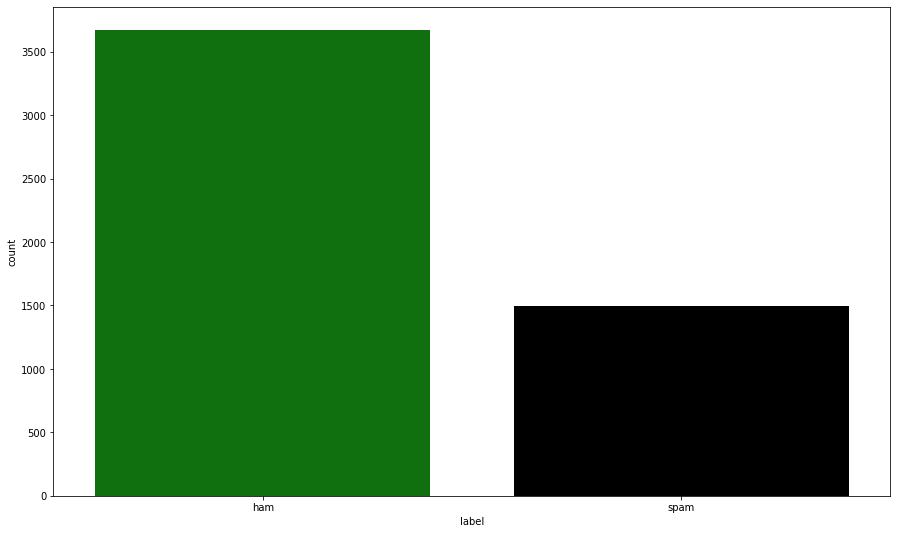

In [7]:
plt.figure(figsize=(15,9))
ax = sns.countplot(df.label,palette=['green','black'])
plt.show()

In [8]:
df['label'] = df['label_num'].apply (lambda x : 1 if x == 1 else 0)
df.label

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label, Length: 5171, dtype: int64

In [9]:
df[['label', 'label_num']].sample(5)

,label,label_num
2540,0,0
5041,1,1
318,1,1
1016,0,0
1734,0,0


In [10]:
df['label'].equals(df['label_num'])

True

In [11]:
df.drop (['label_num'], axis =1, inplace = True )

In [12]:
df.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split (df.text, df.label, test_size =0.30, random_state =0)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
v = CountVectorizer ()

In [17]:
X_train_count = v. fit_transform (X_train.values)
X_train_count.toarray()#[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
model = MultinomialNB ()

In [20]:
model.fit(X_train_count , y_train)

MultinomialNB()

In [21]:
X_test_count = v.transform(X_test) 
model.score (X_test_count, y_test)

0.9774484536082474

In [22]:
y_pred = model.predict (X_test_count)

In [23]:
email = ['Congratulation! you have won the biggest prize', 
         'I am glad that we now work together', 
         'Send us your crypto address to send you free Bitcoins',
         'We offer you 25% discount on our product', 
         'Hi are youn interested about crypto currencies?',
         'Please contact me for further details regarding our project'] 
email_count = v.transform (email)

In [24]:
pred_w= model.predict (email_count )
pred_w

array([1, 0, 1, 1, 1, 0])

In [25]:
for w, n in zip(email,pred_w) :
 if n == 0:
  print (w,': Not spam')
 else: 
  print (w,': spam')

Congratulation! you have won the biggest prize : spam
I am glad that we now work together : Not spam
Send us your crypto address to send you free Bitcoins : spam
We offer you 25% discount on our product : spam
Hi are youn interested about crypto currencies? : spam
Please contact me for further details regarding our project : Not spam


Model Evaluation :

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1128
           1       0.97      0.95      0.96       424

    accuracy                           0.98      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.98      0.98      0.98      1552



 **1--Precision measures how accurate our model is ( when a model makes a predicition, how often it is correct).**

 **2--Recal is the ratio of positive instances/opservations that are correctly classified.**

**3--F1-score is the harmonic mean(gives more weights to small values) betewen Precision and Recal.The bigger the F-score the better our model is.**


In [27]:
from sklearn.metrics import roc_curve

Text(0, 0.5, 'True Positive Rate ')

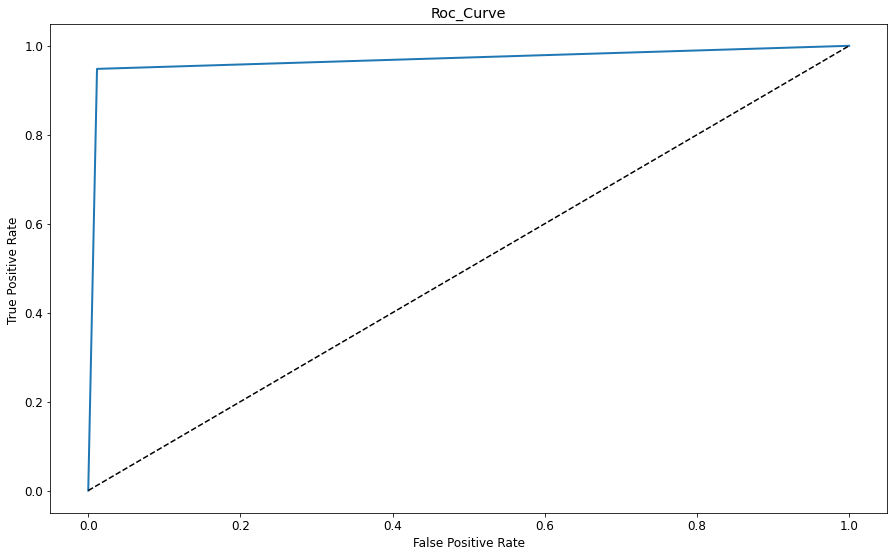

In [30]:
plt.figure(figsize=(15,9))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
plt.plot (fpr, tpr, linewidth =2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title ('Roc_Curve')
plt.xlabel('False Positive Rate') 
plt.ylabel ('True Positive Rate ')

***ROC : It's an abbreviation of "Receiver Operating Charactristic Curve".It plots (True positive Rate) against (False Positive Rate).***

*-True positive Rate(Sensitivity) : The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. Tp/Tp+Fn*

*-False Positive Rate(Specificity): The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. Tn/Tn+Fp*



In [29]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9683


**-AUC(Area Under The Curve) : The more close this area to one , the better the model.**